# Analyzing the scraped data
When scraping data from the internet, we often need to do some "sanity checks" to make sure that the collected data is what we expect it to be, because in scraping we are exposed to connection problems, bans from the host, and errors caused by the differences between the HTML structures of different web pages.

In this notebook, you are asked to plot some graphs to explore the data that you have collected and find the problems in it, if any.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from collections import Counter
import datetime


## 1. Exploring the downloaded HTML files

### Task 1.1
In this task, you have to plot the distribution of the file sizes of the HTML pages that you have downloaded. Usually, all pages will have a similar size. If you notice that you have a number of files with a significantly different size than the majority of the files, then it may be a good idea to check these files and explore the reason behind this difference. For example, in our code we are saving empty HTML files if we face an error while downloading the web pages. Therefore, seeing a number of files with size zero in the histogram indicates that we have some HTML pages that were not downloaded.

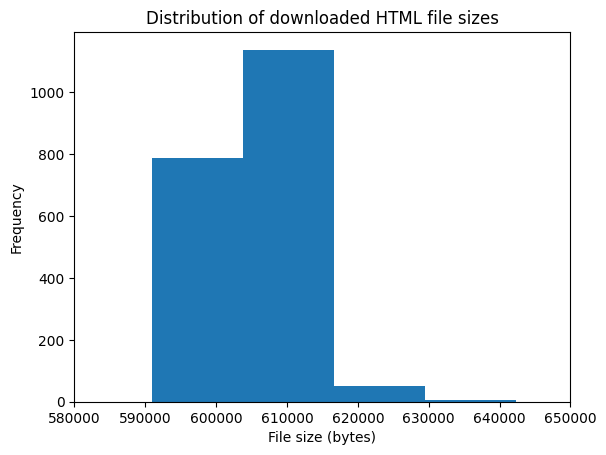

In [2]:
# Plot the distribution of the downloaded HTML file sizes
# WRITE YOUR CODE HERE
html_files = os.listdir("./data/raw_html/")  # Replace with the actual directory of your HTML files
file_sizes = [os.path.getsize(f"./data/raw_html/{f}") for f in html_files]

plt.hist(file_sizes, bins=50)
plt.xlabel("File size (bytes)")
plt.ylabel("Frequency")
plt.title("Distribution of downloaded HTML file sizes")
plt.xlim(580000, 650000)
plt.savefig('figures/html_file_size.png')
plt.show()


### Task 1.2
Since the HTML file size is significantly affected by the images it contains, another way to explore the downloaded HTML files is by looking at the number of lines in each file. In this task, you need to plot a distribution of the number of lines in the downloaded HTML files.

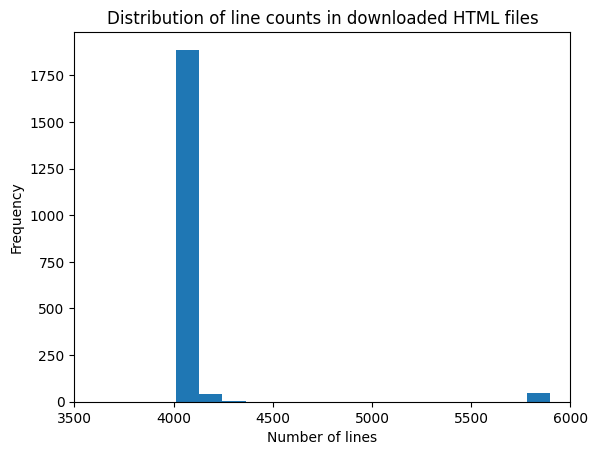

In [3]:
# Plot the distribution of line counts in the downloaded HTML files
# WRITE YOUR CODE HERE
# read all file into one string object

line_counts = [len(open(f"./data/raw_html/{f}", encoding="utf-8").read().split('\\n')) for f in html_files]

plt.hist(line_counts, bins=50)
plt.xlabel("Number of lines")
plt.ylabel("Frequency")
plt.title("Distribution of line counts in downloaded HTML files")
plt.xlim(3500, 6000)
plt.savefig('figures/html_line_count.png')
plt.show()


## 2. Exploring the processed data

### Task 2.1
The first thing to check is if we have extracted information from all of the collected links or not. In this task, you need to compare the number of links that you have collected (in link_list.txt) to the number of parsed data dictionaries (in parsed_data.jsons) that you have created by parsing the downloaded HTML files.

In [4]:

# Compute the number of links in link_list.txt
# WRITE YOUR CODE HERE
n_collected_links = 0

# Compute the number of the parsed data dictionaries in parsed_data.jsons
# WRITE YOUR CODE HERE
n_parsed_links = 0

with open("data/link_list.txt", "r") as f:
    n_collected_links = sum(1 for line in f)

with open("data/parsed_data.jsons", "r") as f:
    n_parsed_links = sum(1 for line in f)


print(f"Number of collected links: {n_collected_links}")
print(f"Number of parsed links: {n_parsed_links}")

Number of collected links: 2001
Number of parsed links: 1982


### Task 2.2
In this task, you need to plot the distribution of line counts in the text content that you extracted from the HTML web pages. This will help point out some errors in content extraction, if any.

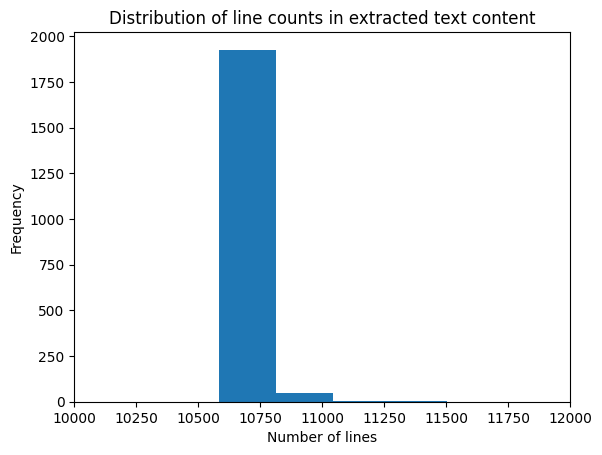

In [5]:
from bs4 import BeautifulSoup as bs

# Plot the distribution of line counts in the extracted text content
# WRITE YOUR CODE HERE
# python code to read number of lines in a html file    

content_line_counts = [len(bs(open(f"./data/raw_html/{f}", encoding="utf-8").read(), "html.parser").prettify().split('\n')) for f in html_files]

plt.hist(content_line_counts, bins=50)
plt.xlabel("Number of lines")
plt.ylabel("Frequency")
plt.title("Distribution of line counts in extracted text content")
plt.xlim(10000, 12000)
plt.savefig('figures/content_line_count.png')
plt.show()



### Task 2.3
In this task, you need to plot the distribution of the dates of the collected news articles.

In [17]:
# Plot the distribution of dates from the extracted date information
# WRITE YOUR CODE HERE

with open("data/parsed_data.jsons", "r") as f:
    dates = [json.loads(line)["date"] for line in f if json.loads(line)["date"] is not None]

for i in range(len(dates)):
    dates[i].replace('\\n', '')

date_counts = Counter(dates)

date_objects = [datetime.datetime.strptime(date, "%B %d, %Y") for date in date_counts.keys()]
date_counts_list = list(date_counts.values())

plt.bar(date_objects, date_counts_list)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Distribution of dates from the extracted date information")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/date_dist.png')
plt.show()


ValueError: time data '\\nJuly 27, 2013' does not match format '%B %d, %Y'